In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from pprint import pprint as pp
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
df_train = pd.read_csv("new_isc_04.csv")
df_test = pd.read_csv("secret_isc_04.csv")

def print_shape_and_columns( msg, df ):
    print(msg)
    print(df.shape)
    print(df.columns)


print_shape_and_columns( "train set", df_train )
print_shape_and_columns( "test set", df_test )

train set
(62274, 11)
Index(['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'remaining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')
test set
(10000, 11)
Index(['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'remaining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')


In [ ]:
# Nadaje indexy kolumnom
id_col_idx = 0
is_tv_subscriber_col_idx = 1
is_movie_package_subscriber_col_idx = 2
subscription_age_col_idx = 3
bill_avg_col_idx = 4
remaining_contract_col_idx = 5
service_failure_count_col_idx = 6
download_avg_col_idx = 7
upload_avg_col_idx = 8
download_over_limit_col_idx = 9
churn_col_idx = 10

**Uzupełnianie pustych wartości**

In [ ]:
def dataset_cleanup( df ):

    df_smart = df.copy()
    column_names = df_smart.columns

    df_smart.isna().sum()

    print(column_names)

 # Wpisuje 0 w puste miejsce w kolumnie remaining_contract dla churn=1
    dataset=df_smart.query('churn==1')[ column_names[remaining_contract_col_idx] ]
    #median=dataset.median()
    n=dataset.isna().sum()
    if n > 0:
        _rowsindx=df_smart.query('remaining_contract.isnull() and churn==1').index
        df_smart.loc[_rowsindx, "remaining_contract"]=0.0


    # Oblicza średnią dla zbioru churn=0 i dla każdej unikatowej wartości z kolumny subscription_age i wpisuje ją w puste miejsce
    vallist = df_smart["subscription_age"].unique()

    for v in vallist:
        dataset=df_smart.query(f"remaining_contract.isnull() and churn==0 and subscription_age=={v}")[ column_names[remaining_contract_col_idx] ]
        if dataset.shape[0] > 0:
            #print(f"clean up for {v}")
            median = df_smart.query(f"churn==0 and subscription_age=={v}")[column_names[subscription_age_col_idx]].median()
            _rowsindx = df_smart.query(f"remaining_contract.isnull() and churn==0 and subscription_age=={v}").index
            df_smart.loc[_rowsindx, "remaining_contract"]=median

    # Oblicza średnią dla zbioru s_tv_subscriber=0 and is_movie_package_subscriber=0 i wpisuje średnią w puste miejsca w kolumnie download_avg
    dataset=df_smart.query('is_tv_subscriber==0 and is_movie_package_subscriber==0')[ column_names[download_avg_col_idx] ]
    median=dataset.median()
    n=dataset.isna().sum()
    if n > 0:
        print('konieczne czyszczenie danych w kolumnie download_avg dla is_tv_subscriber=0 and is_movie_package_subscriber=0')
        _rowsindx=df_smart.query('is_tv_subscriber==0 and is_movie_package_subscriber==0 and download_avg.isnull()').index
        df_smart.loc[_rowsindx, "download_avg"]=median

    # Oblicza statystyki dla zbioru s_tv_subscriber=0 and is_movie_package_subscriber=1 i wpisuje średnią w puste miejsca w kolumnie download_avg
    dataset=df_smart.query('is_tv_subscriber==0 and is_movie_package_subscriber==1')[ column_names[download_avg_col_idx] ]
    median=dataset.median()
    n=dataset.isna().sum()
    if n > 0:
        print('konieczne czyszczenie danych w kolumnie download_avg dla is_tv_subscriber=0 and is_movie_package_subscriber=1')
        _rowsindx=df_smart.query('is_tv_subscriber==0 and is_movie_package_subscriber==1 and download_avg.isnull()').index
        df_smart.loc[_rowsindx, "download_avg"]=median

    # Oblicza statystyki dla zbioru s_tv_subscriber=1 and is_movie_package_subscriber=0 i wpisuje średnią w puste miejsca w kolumnie download_avg
    dataset=df_smart.query('is_tv_subscriber==1 and is_movie_package_subscriber==0')[ column_names[download_avg_col_idx] ]
    median=dataset.median()
    n=dataset.isna().sum()
    if n > 0:
        print('konieczne czyszczenie danych w kolumnie download_avg dla is_tv_subscriber=1 and is_movie_package_subscriber=0')
        _rowsindx=df_smart.query('is_tv_subscriber==1 and is_movie_package_subscriber==0 and download_avg.isnull()').index
        df_smart.loc[_rowsindx, "download_avg"]=median

    # Oblicza statystyki dla zbioru s_tv_subscriber=1 and is_movie_package_subscriber=1 i wpisuje średnią w puste miejsca w kolumnie download_avg
    dataset=df_smart.query('is_tv_subscriber==1 and is_movie_package_subscriber==1')[ column_names[download_avg_col_idx] ]
    median=dataset.median()
    n=dataset.isna().sum()
    if n > 0:
        print('konieczne czyszczenie danych w kolumnie download_avg dla is_tv_subscriber=1 and is_movie_package_subscriber=1')
        _rowsindx=df_smart.query('is_tv_subscriber==1 and is_movie_package_subscriber==1 and download_avg.isnull()').index
        df_smart.loc[_rowsindx, "download_avg"]=median

    # Oblicza statystyki dla zbioru s_tv_subscriber=0 and is_movie_package_subscriber=0 i wpisuje średnią w puste miejsca w kolumnie upload_avg
    dataset=df_smart.query('is_tv_subscriber==0 and is_movie_package_subscriber==0')[ column_names[upload_avg_col_idx] ]
    median=dataset.median()
    n=dataset.isna().sum()
    if n > 0:
        print('konieczne czyszczenie danych w kolumnie upload_avg dla is_tv_subscriber=0 and is_movie_package_subscriber=0')
        _rowsindx=df_smart.query('is_tv_subscriber==0 and is_movie_package_subscriber==0 and upload_avg.isnull()').index
        df_smart.loc[_rowsindx, "upload_avg"]=median

    # Oblicza statystyki dla zbioru s_tv_subscriber=0 and is_movie_package_subscriber=1 i wpisuje średnią w puste miejsca w kolumnie upload_avg
    dataset=df_smart.query('is_tv_subscriber==0 and is_movie_package_subscriber==1')[ column_names[upload_avg_col_idx] ]
    median=dataset.median()
    n=dataset.isna().sum()
    if n > 0:
        print('konieczne czyszczenie danych w kolumnie upload_avg dla is_tv_subscriber=0 and is_movie_package_subscriber=1')
        _rowsindx=df_smart.query('is_tv_subscriber==0 and is_movie_package_subscriber==1 and upload_avg.isnull()').index
        df_smart.loc[_rowsindx, "upload_avg"]=median

    # Oblicza statystyki dla zbioru s_tv_subscriber=1 and is_movie_package_subscriber=0 i wpisuje średnią w puste miejsca w kolumnie upload_avg
    dataset=df_smart.query('is_tv_subscriber==1 and is_movie_package_subscriber==0')[ column_names[upload_avg_col_idx] ]
    median=dataset.median()
    n=dataset.isna().sum()
    if n > 0:
        print('konieczne czyszczenie danych w kolumnie upload_avg dla is_tv_subscriber=1 and is_movie_package_subscriber=0')
        _rowsindx=df_smart.query('is_tv_subscriber==1 and is_movie_package_subscriber==0 and upload_avg.isnull()').index
        df_smart.loc[_rowsindx, "upload_avg"]=median

    # Oblicza statystyki dla zbioru s_tv_subscriber=1 and is_movie_package_subscriber=1 i wpisuje średnią w puste miejsca w kolumnie upload_avg
    dataset=df_smart.query('is_tv_subscriber==1 and is_movie_package_subscriber==1')[ column_names[upload_avg_col_idx] ]
    median=dataset.median()
    n=dataset.isna().sum()
    if n > 0:
        print('konieczne czyszczenie danych w kolumnie upload_avg dla is_tv_subscriber=1 and is_movie_package_subscriber=1')
        _rowsindx=df_smart.query('is_tv_subscriber==1 and is_movie_package_subscriber==1 and upload_avg.isnull()').index
        df_smart.loc[_rowsindx, "upload_avg"]=median

    # Oblicza statystyki dla zbioru churn=1 i wpisuje 0 w puste miejsca w kolumnie remaining_contract
    dataset=df_smart.query('churn==1')[ column_names[remaining_contract_col_idx] ]
    median=dataset.median()
    n=dataset.isna().sum()
    if n > 0:
        _rowsindx=df_smart.query('remaining_contract.isnull() and churn==1').index
        df_smart.loc[_rowsindx, "remaining_contract"]=0.0

    # Sprawdza czy pozostały kolumny z pustymi miejscami
    df_smart[ column_names[download_avg_col_idx] ].isna().sum()
    df_smart[ column_names[upload_avg_col_idx] ].isna().sum()

    df_smart.isna().sum()

    return df_smart

def data_visualisation( df ):
    # Wizualizacja danych
    df.hist(bins=50, figsize=(25, 20))
    plt.show()

    df.describe()


    column_names = df.columns
    plt.figure(figsize=(20, 20))

    for i, feature in enumerate(column_names, 1):
        plt.subplot(4, 3, i)
        if i in [1, 2]:
            sns.barplot(hue='churn', y=feature, data=df, palette=['red', 'blue'], legend=False)
        else:
            sns.stripplot(x='churn', y=feature, data=df, jitter=True, palette='Set1', legend=False)
        plt.title(f'Churn vs {feature}')

    plt.tight_layout()
    plt.show()

    plt.figure( figsize=(10, 6) )

    sns.histplot( df[df['is_tv_subscriber'] == 1]['churn'], color='blue', alpha=0.6, label='TV Subscriber', binwidth=0.1)
    sns.histplot( df[df['is_movie_package_subscriber'] == 1]['churn'], color='red', alpha=0.6, label='Movie Package Subscriber', binwidth=0.2)

    plt.title('Churn vs. TV and Movie Package Subscribers')
    plt.xticks([0, 1])
    plt.xlabel('Churn')
    plt.ylabel('Count')
    plt.legend()

    plt.show()


    correlation_matrix = df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.show()

def data_visualisation_add( df ):
    plt.figure(figsize = (10,6))
    sns.histplot(data = df, x= 'subscription_age', hue = 'churn')
    plt.title('Subscription age versus churn')
    plt.show()

In [ ]:
df_smart_train = dataset_cleanup( df_train )
df_smart_test = dataset_cleanup( df_test )



Index(['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'remaining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')
konieczne czyszczenie danych w kolumnie download_avg dla is_tv_subscriber=0 and is_movie_package_subscriber=0
konieczne czyszczenie danych w kolumnie download_avg dla is_tv_subscriber=1 and is_movie_package_subscriber=0
konieczne czyszczenie danych w kolumnie download_avg dla is_tv_subscriber=1 and is_movie_package_subscriber=1
konieczne czyszczenie danych w kolumnie upload_avg dla is_tv_subscriber=0 and is_movie_package_subscriber=0
konieczne czyszczenie danych w kolumnie upload_avg dla is_tv_subscriber=1 and is_movie_package_subscriber=0
konieczne czyszczenie danych w kolumnie upload_avg dla is_tv_subscriber=1 and is_movie_package_subscriber=1
Index(['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_

In [ ]:
# Sprawdza czy pozostały kolumny z pustymi miejscami

column_names  = df_smart_train.columns

print(df_smart_train[ column_names[download_avg_col_idx] ].isna().sum())
print(df_smart_train[ column_names[upload_avg_col_idx] ].isna().sum())

print(df_smart_train.isna().sum())

0
0
id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
remaining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64


In [ ]:
# Sprawdza czy pozostały kolumny z pustymi miejscami
print(df_smart_test[ column_names[download_avg_col_idx] ].isna().sum())
print(df_smart_test[ column_names[upload_avg_col_idx] ].isna().sum())

df_smart_test.isna().sum()

0
0


id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
remaining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

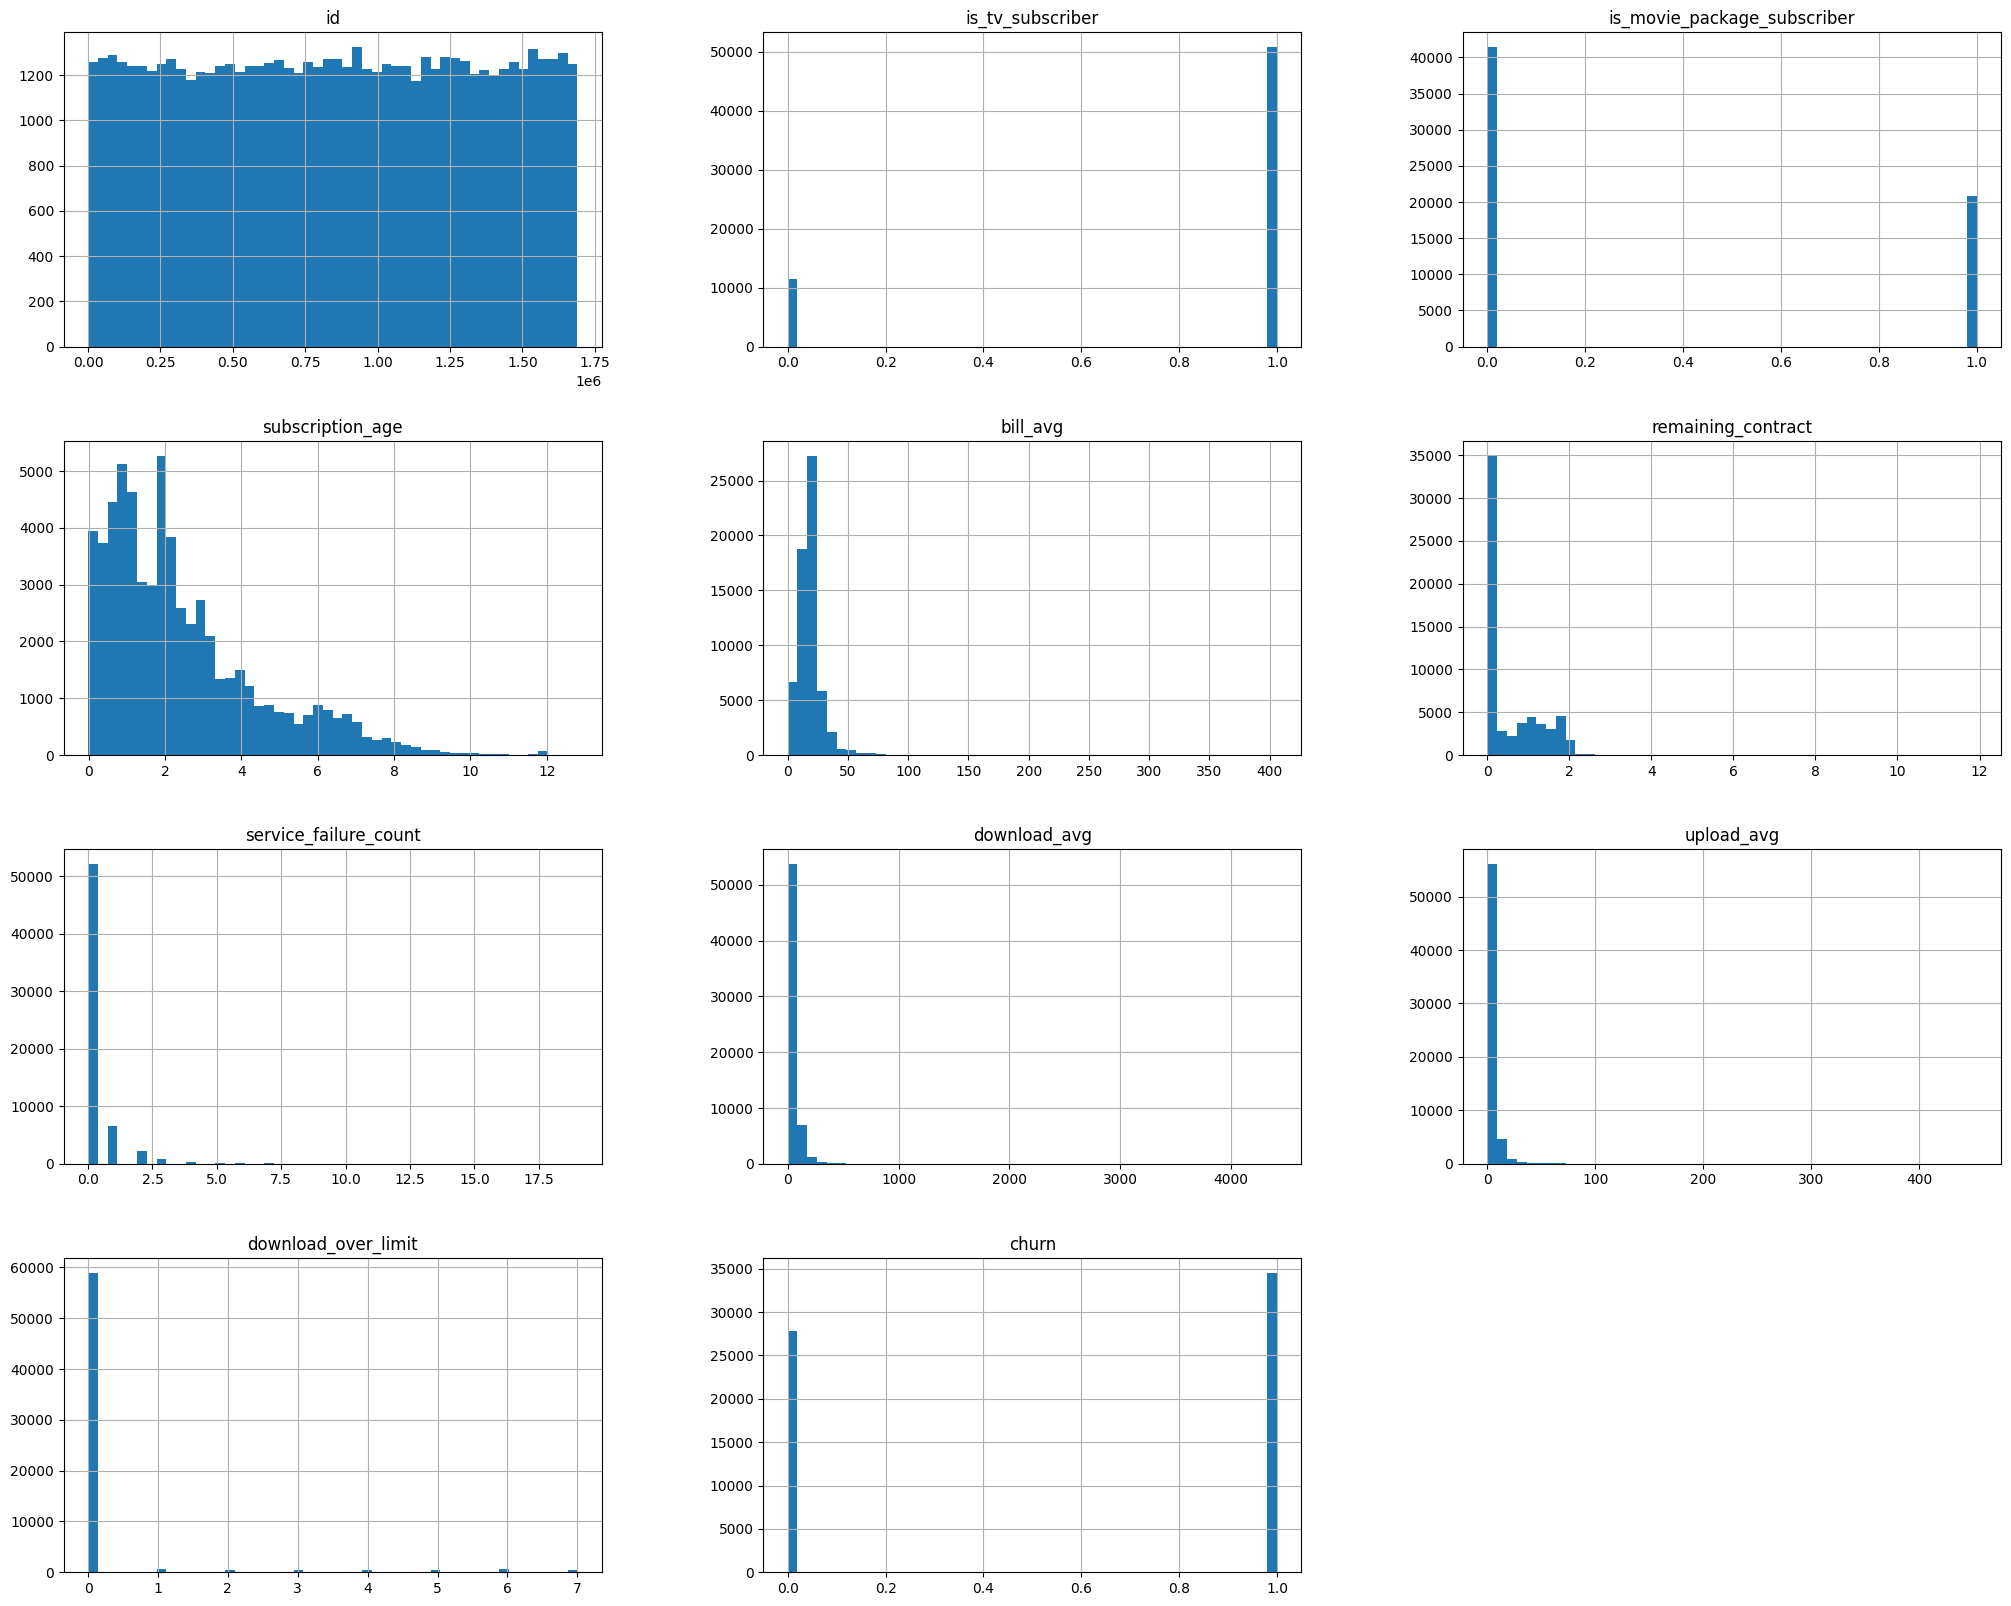

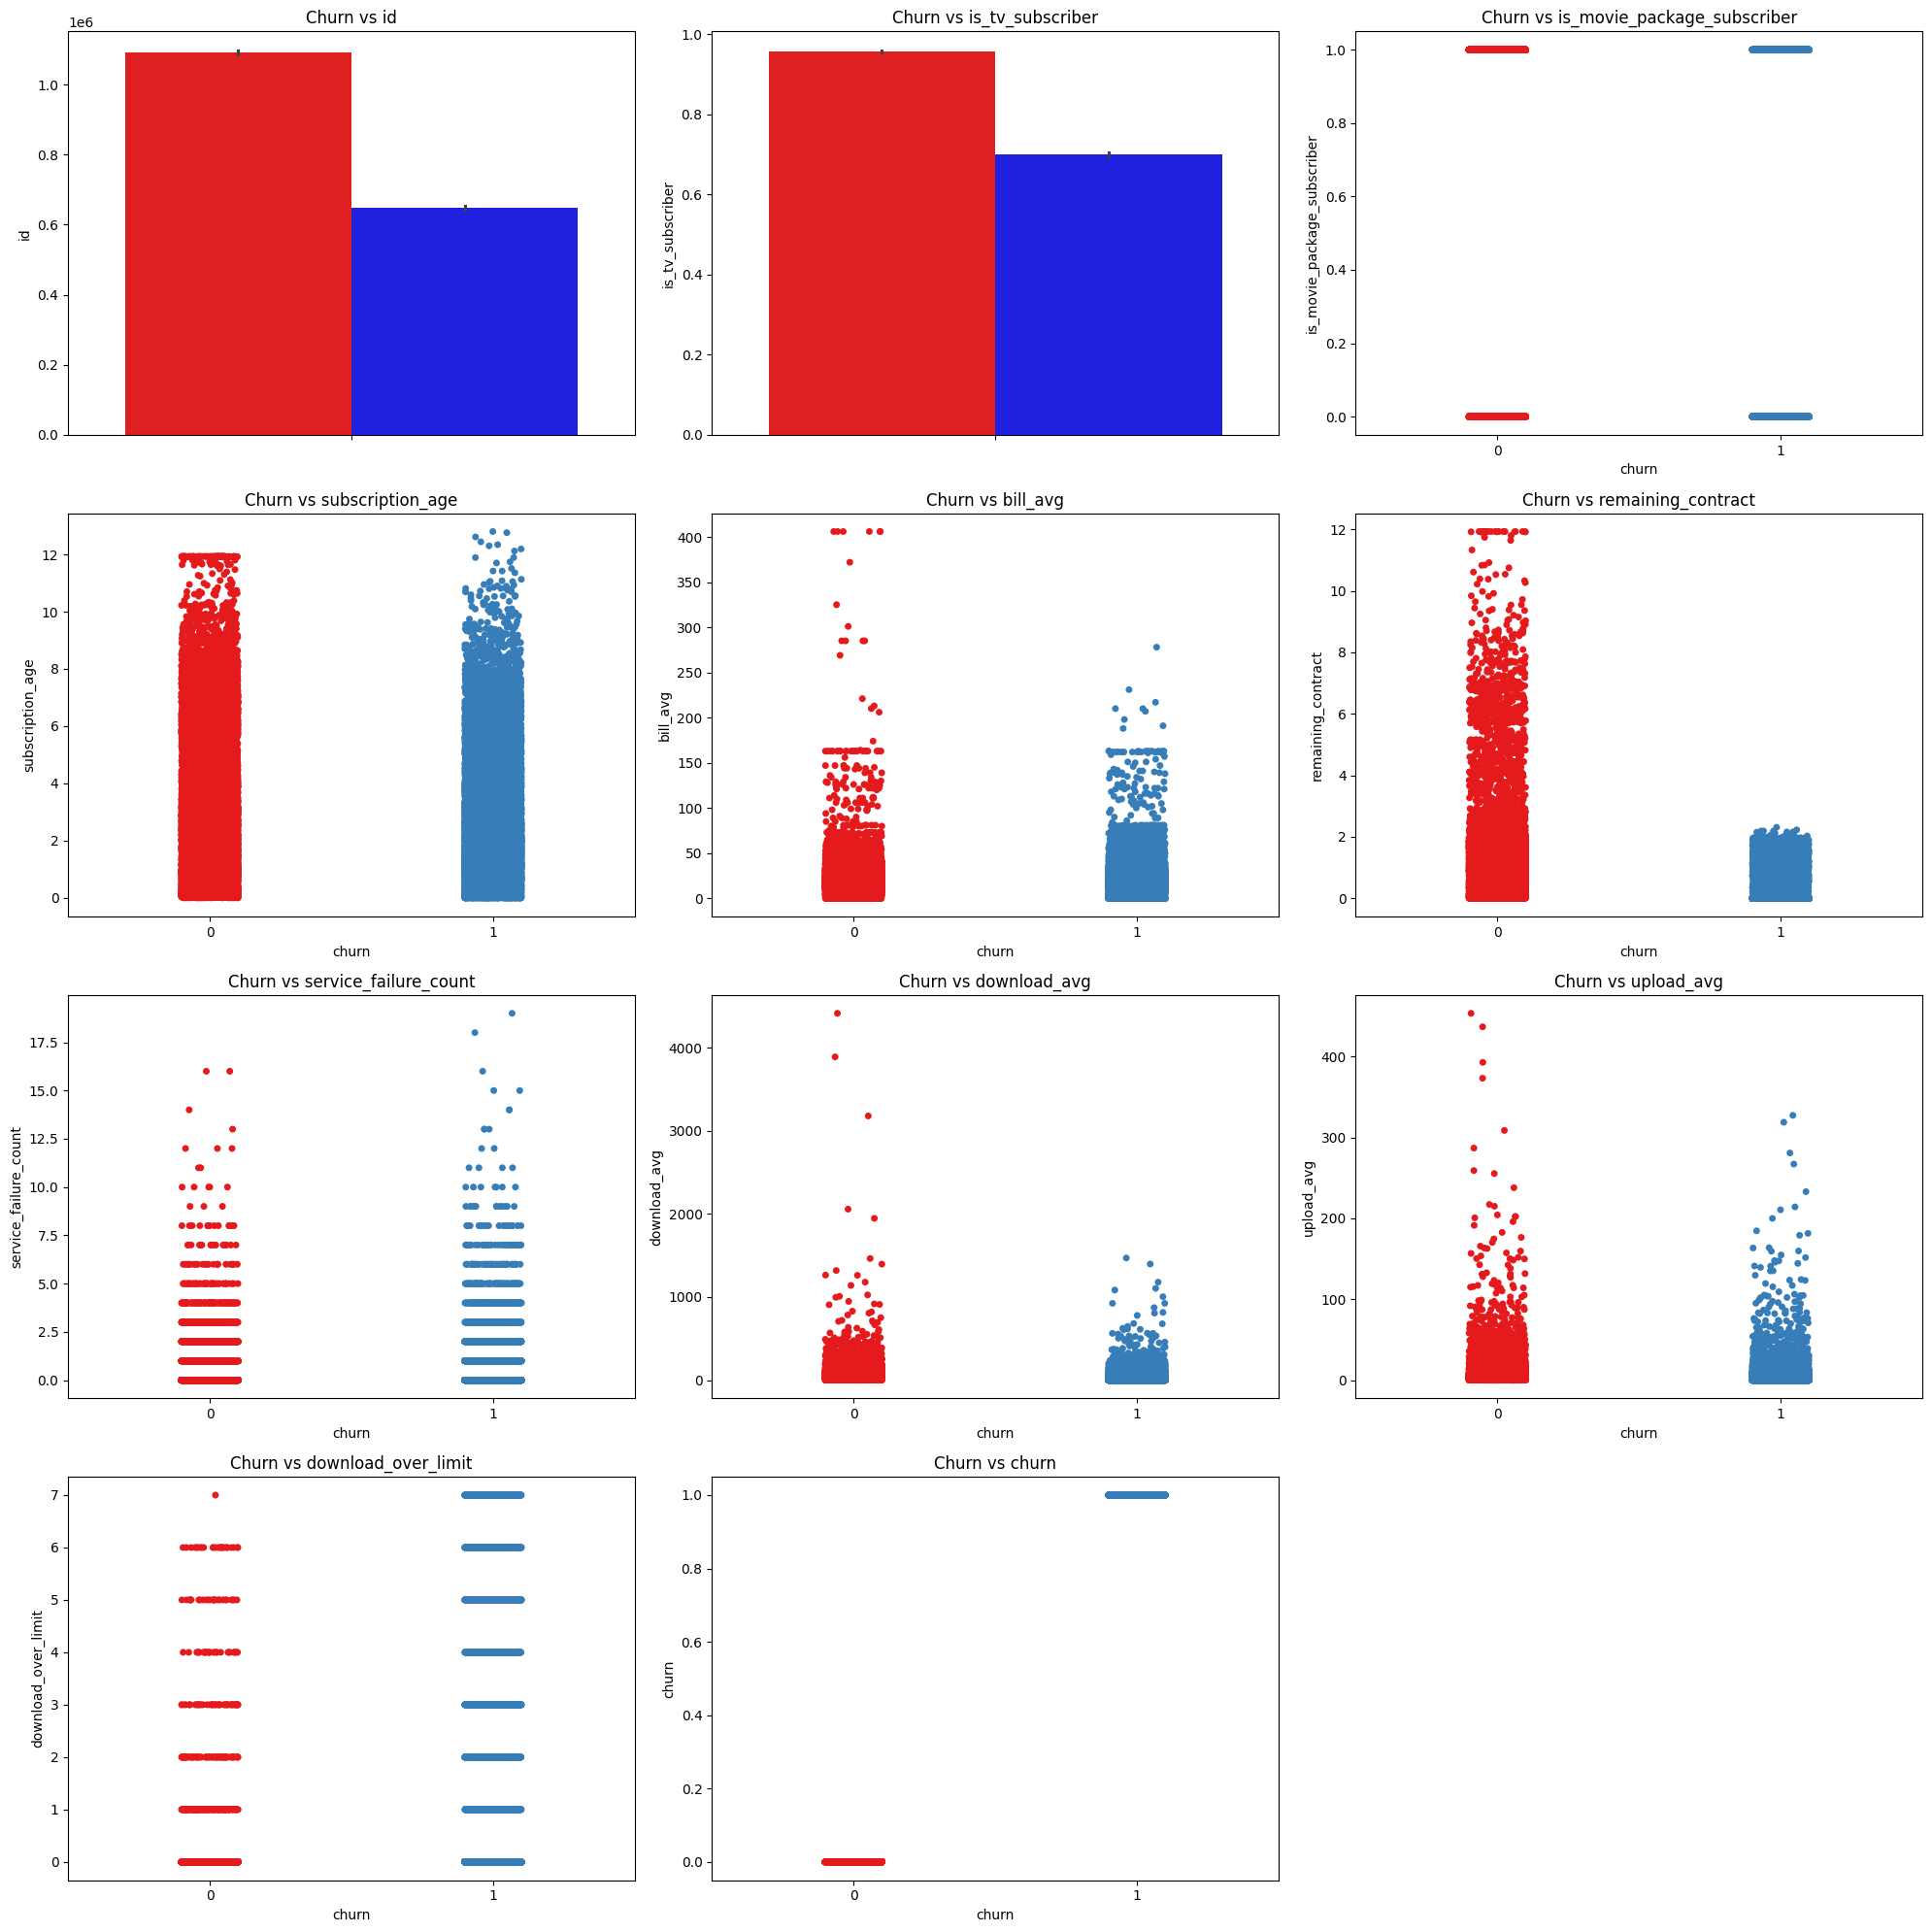

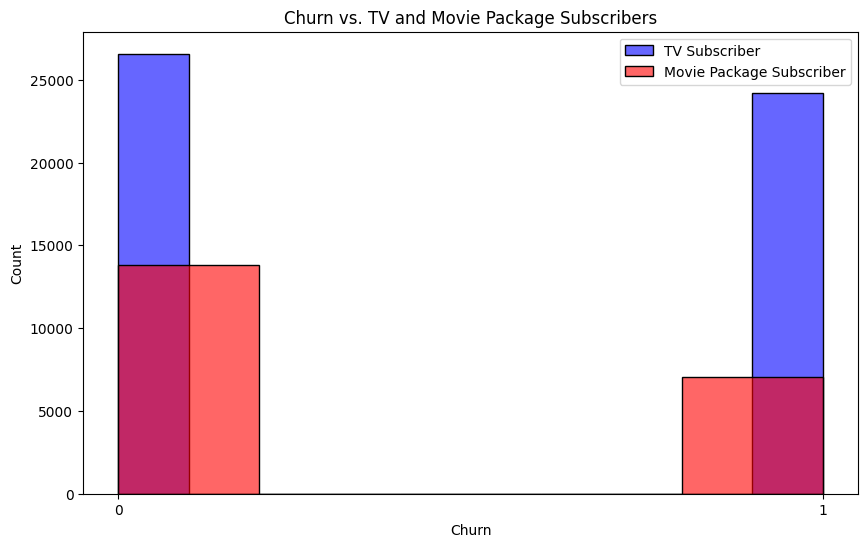

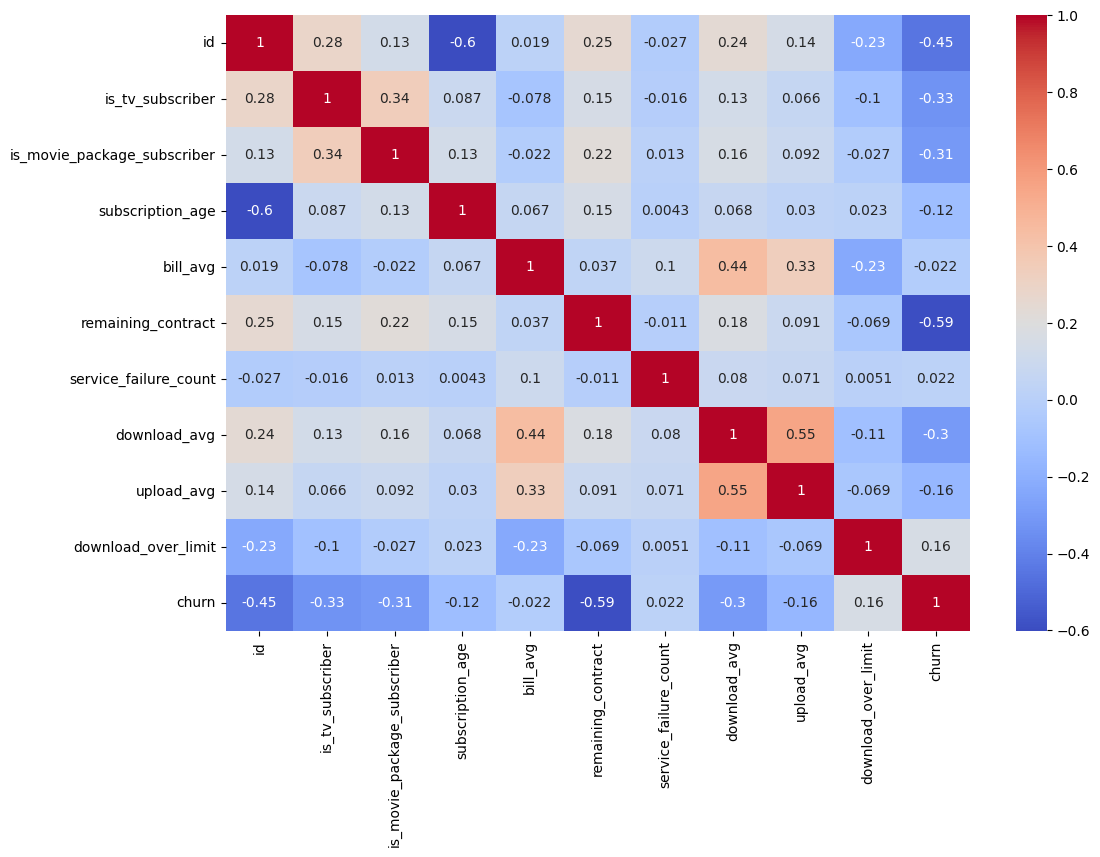

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

data_visualisation( df_smart_train )

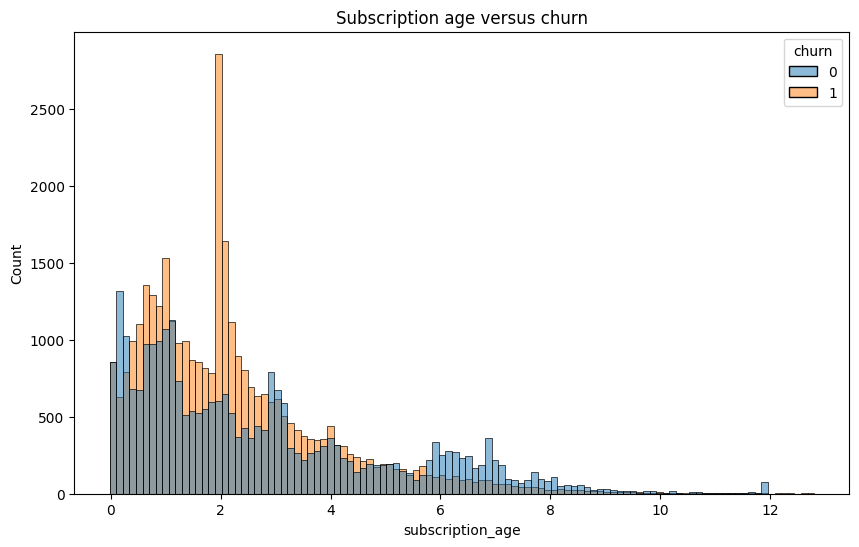

In [ ]:
data_visualisation_add( df_smart_train )

is_tv_subscriber               0.065907
is_movie_package_subscriber    0.051372
subscription_age               0.056396
bill_avg                       0.068768
remaining_contract             0.518836
service_failure_count          0.000000
download_avg                   0.153822
upload_avg                     0.143037
download_over_limit            0.016036
dtype: float64


<Axes: >

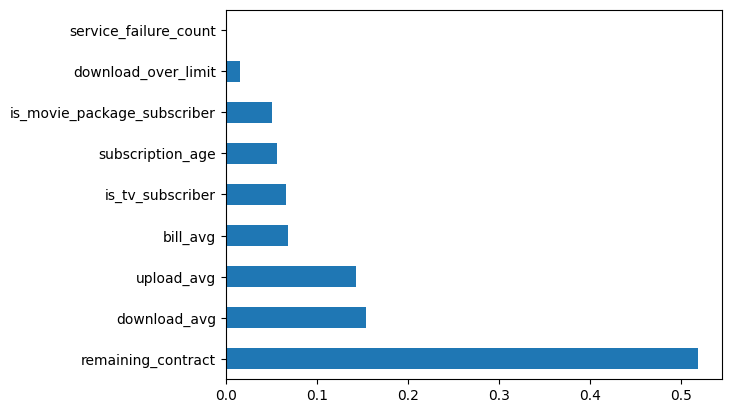

In [ ]:
from sklearn.feature_selection import mutual_info_classif

y=df_smart_train["churn"]
x=df_smart_train[["is_tv_subscriber","is_movie_package_subscriber","subscription_age","bill_avg","remaining_contract","service_failure_count","download_avg","upload_avg","download_over_limit"]]

important_features=mutual_info_classif(x,y)

feat_importances=pd.Series(important_features,df_smart_train.columns[1:len(df_smart_train.columns)-1])
print(feat_importances)

feat_importances.nlargest(10).plot(kind='barh')

In [ ]:
x_vars = df_smart_train[['id', 'is_tv_subscriber','is_movie_package_subscriber','subscription_age','service_failure_count',
         'download_avg','upload_avg','bill_avg','remaining_contract']]
y_var  = df_smart_train['churn']

x_vars_test = df_smart_test[['id', 'is_tv_subscriber','is_movie_package_subscriber','subscription_age','service_failure_count',
         'download_avg','upload_avg','bill_avg','remaining_contract']]
y_var_test  = df_smart_test['churn']

# Podział danych na treningowe i testowe dla zbioru df_smart_train
xTrain, xTest, yTrain, yTest = train_test_split(x_vars, y_var, test_size=0.2, random_state=1234)

# Model Logistyczna regresja
logitmodel = LogisticRegression(max_iter=16384, random_state=1234)
logitmodel.fit(xTrain,yTrain)

predictions_train = logitmodel.predict(xTrain)
print('Accuracy Score on train data: ', accuracy_score(yTrain, predictions_train))

predictions_test = logitmodel.predict(xTest)
print('Accuracy Score on train test data: ', accuracy_score(yTest, predictions_test))

s = classification_report(yTest, predictions_test)
pp(s)

# testy na zbiorze df_smart_test
predictions_test = logitmodel.predict(x_vars_test)
print('Accuracy Score on test data: ', accuracy_score(y_var_test, predictions_test))

Accuracy Score on train data:  0.44669704329673415
Accuracy Score on train test data:  0.44311521477318344
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.44      1.00      0.61      5519\n'
 '           1       0.00      0.00      0.00      6936\n'
 '\n'
 '    accuracy                           0.44     12455\n'
 '   macro avg       0.22      0.50      0.31     12455\n'
 'weighted avg       0.20      0.44      0.27     12455\n')
Accuracy Score on test data:  0.4451


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Model SVM

svm_model = SVC()
svm_model.fit(xTrain, yTrain)

predictions_train = svm_model.predict(xTrain)
print('Accuracy Score on train data: ', accuracy_score(yTrain, predictions_train))

predictions_test = svm_model.predict(xTest)
print('Accuracy Score on train test data: ', accuracy_score(yTest, predictions_test))

s = classification_report(yTest, predictions_test)
pp(s)

predictions_test = svm_model.predict(x_vars_test)
print('Accuracy Score on test data: ', accuracy_score(y_var_test, predictions_test))

Accuracy Score on train data:  0.7121780846664927
Accuracy Score on train test data:  0.7100762745885186
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.69      0.64      0.66      5519\n'
 '           1       0.73      0.77      0.75      6936\n'
 '\n'
 '    accuracy                           0.71     12455\n'
 '   macro avg       0.71      0.70      0.70     12455\n'
 'weighted avg       0.71      0.71      0.71     12455\n')
Accuracy Score on test data:  0.7164


In [ ]:
dtc_model = DecisionTreeClassifier(max_depth=5, random_state=1234)
dtc_model.fit(xTrain, yTrain)

predictions_train = dtc_model.predict(xTrain)
print('Accuracy Score on train data: ', accuracy_score(yTrain, predictions_train))

predictions_test = dtc_model.predict(xTest)
print('Accuracy Score on test data: ', accuracy_score(yTest, predictions_test))

s = classification_report(yTest, predictions_test)
pp(s)

predictions_test = dtc_model.predict(x_vars_test)
print('Accuracy Score on test data: ', accuracy_score(y_var_test, predictions_test))

Accuracy Score on train data:  0.9650334209839619
Accuracy Score on test data:  0.9657165796868727
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.93      1.00      0.96      5519\n'
 '           1       1.00      0.94      0.97      6936\n'
 '\n'
 '    accuracy                           0.97     12455\n'
 '   macro avg       0.96      0.97      0.97     12455\n'
 'weighted avg       0.97      0.97      0.97     12455\n')
Accuracy Score on test data:  0.9663


In [ ]:
x_vars = df_smart_train[['is_tv_subscriber','is_movie_package_subscriber','subscription_age','service_failure_count',
         'download_avg','upload_avg','bill_avg','remaining_contract']]
#x_vars = df_smart[['is_tv_subscriber','is_movie_package_subscriber','subscription_age','service_failure_count',
#         'download_avg','bill_avg','remaining_contract']]
y_var  = df_smart_train['churn']

x_vars_test = df_smart_test[['is_tv_subscriber','is_movie_package_subscriber','subscription_age','service_failure_count',
         'download_avg','upload_avg','bill_avg','remaining_contract']]
y_var_test  = df_smart_test['churn']


xTrain, xTest, yTrain, yTest = train_test_split(x_vars, y_var, test_size=0.2, random_state=1234)

# Learning Model LogisticRegression
logit_model = LogisticRegression(max_iter=4096)
logit_model.fit(xTrain,yTrain)

predictions_train = logit_model.predict(xTrain)
print(accuracy_score(yTrain, predictions_train))

predictions_test = logit_model.predict(xTest)
print(accuracy_score(yTest, predictions_test))

s = classification_report(yTest, predictions_test)
pp(s)

predictions_test = logit_model.predict(x_vars_test)
print('Accuracy Score on test data: ', accuracy_score(y_var_test, predictions_test))


0.8867701077902005
0.8927338418305901
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.91      0.84      0.87      5519\n'
 '           1       0.88      0.93      0.91      6936\n'
 '\n'
 '    accuracy                           0.89     12455\n'
 '   macro avg       0.90      0.89      0.89     12455\n'
 'weighted avg       0.89      0.89      0.89     12455\n')
Accuracy Score on test data:  0.8896


In [ ]:
dtc_model = DecisionTreeClassifier(max_depth=5, random_state=1234)
dtc_model.fit(xTrain, yTrain)

predictions_train = dtc_model.predict(xTrain)
print('Accuracy Score on train data: ', accuracy_score(yTrain, predictions_train))

predictions_test = dtc_model.predict(xTest)
print('Accuracy Score on test data: ', accuracy_score(yTest, predictions_test))

s = classification_report(yTest, predictions_test)
pp(s)

predictions_test = dtc_model.predict(x_vars_test)
print('Accuracy Score on test data: ', accuracy_score(y_var_test, predictions_test))


Accuracy Score on train data:  0.9616411409301672
Accuracy Score on test data:  0.9611401043757527
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.92      1.00      0.96      5519\n'
 '           1       1.00      0.93      0.96      6936\n'
 '\n'
 '    accuracy                           0.96     12455\n'
 '   macro avg       0.96      0.96      0.96     12455\n'
 'weighted avg       0.96      0.96      0.96     12455\n')
Accuracy Score on test data:  0.9631


In [ ]:
dtc_model = DecisionTreeClassifier(criterion = 'gini', max_depth=50, random_state=1234)
dtc_model.fit(xTrain, yTrain)

predictions_train = dtc_model.predict(xTrain)
print('Accuracy Score on train data: ', accuracy_score(yTrain, predictions_train))

predictions_test = dtc_model.predict(xTest)
print('Accuracy Score on test data: ', accuracy_score(yTest, predictions_test))

s = classification_report(yTest, predictions_test)
pp(s)

predictions_test = dtc_model.predict(x_vars_test)
print('Accuracy Score on test data: ', accuracy_score(y_var_test, predictions_test))


Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9496587715776796
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.95      0.94      0.94      5519\n'
 '           1       0.95      0.96      0.95      6936\n'
 '\n'
 '    accuracy                           0.95     12455\n'
 '   macro avg       0.95      0.95      0.95     12455\n'
 'weighted avg       0.95      0.95      0.95     12455\n')
Accuracy Score on test data:  0.9483


In [ ]:
dtc_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=50, random_state=1234)
dtc_model.fit(xTrain, yTrain)

predictions_train = dtc_model.predict(xTrain)
print('Accuracy Score on train data: ', accuracy_score(yTrain, predictions_train))

predictions_test = dtc_model.predict(xTest)
print('Accuracy Score on test data: ', accuracy_score(yTest, predictions_test))

s = classification_report(yTest, predictions_test)
pp(s)

predictions_test = dtc_model.predict(x_vars_test)
print('Accuracy Score on test data: ', accuracy_score(y_var_test, predictions_test))


Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9490967482938579
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.95      0.94      0.94      5519\n'
 '           1       0.95      0.96      0.95      6936\n'
 '\n'
 '    accuracy                           0.95     12455\n'
 '   macro avg       0.95      0.95      0.95     12455\n'
 'weighted avg       0.95      0.95      0.95     12455\n')
Accuracy Score on test data:  0.9453


In [ ]:
dtc_model = DecisionTreeClassifier(criterion = 'log_loss', max_depth=50, random_state=1234)
dtc_model.fit(xTrain, yTrain)

predictions_train = dtc_model.predict(xTrain)
print('Accuracy Score on train data: ', accuracy_score(yTrain, predictions_train))

predictions_test = dtc_model.predict(xTest)
print('Accuracy Score on test data: ', accuracy_score(yTest, predictions_test))

s = classification_report(yTest, predictions_test)
pp(s)

predictions_test = dtc_model.predict(x_vars_test)
print('Accuracy Score on test data: ', accuracy_score(y_var_test, predictions_test))


Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9490967482938579
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.95      0.94      0.94      5519\n'
 '           1       0.95      0.96      0.95      6936\n'
 '\n'
 '    accuracy                           0.95     12455\n'
 '   macro avg       0.95      0.95      0.95     12455\n'
 'weighted avg       0.95      0.95      0.95     12455\n')
Accuracy Score on test data:  0.9453


In [ ]:
x_vars = df_smart_train[['remaining_contract','download_avg','upload_avg', 'bill_avg', 'is_tv_subscriber','subscription_age']]
#x_vars = df_smart[['is_tv_subscriber','is_movie_package_subscriber','subscription_age','service_failure_count',
#         'download_avg','bill_avg','remaining_contract']]
y_var  = df_smart_train['churn']

x_vars_test = df_smart_test[['remaining_contract','download_avg','upload_avg', 'bill_avg', 'is_tv_subscriber','subscription_age']]
y_var_test  = df_smart_test['churn']

xTrain, xTest, yTrain, yTest = train_test_split(x_vars, y_var, train_size=0.8, random_state=1234)

dtc_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=50, random_state=1234)
dtc_model.fit(xTrain, yTrain)

predictions_train = dtc_model.predict(xTrain)
print('Accuracy Score on train data: ', accuracy_score(yTrain, predictions_train))

predictions_test = dtc_model.predict(xTest)
print('Accuracy Score on test data: ', accuracy_score(yTest, predictions_test))

s = classification_report(yTest, predictions_test)
pp(s)

predictions_test = dtc_model.predict(x_vars_test)
print('Accuracy Score on test data: ', accuracy_score(y_var_test, predictions_test))


Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9449217181854677
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.94      0.93      0.94      5519\n'
 '           1       0.95      0.96      0.95      6936\n'
 '\n'
 '    accuracy                           0.94     12455\n'
 '   macro avg       0.94      0.94      0.94     12455\n'
 'weighted avg       0.94      0.94      0.94     12455\n')
Accuracy Score on test data:  0.947


In [ ]:
x_vars = df_smart_train[['remaining_contract','download_avg','upload_avg', 'bill_avg']]
#x_vars = df_smart[['is_tv_subscriber','is_movie_package_subscriber','subscription_age','service_failure_count',
#         'download_avg','bill_avg','remaining_contract']]
y_var  = df_smart_train['churn']

x_vars_test = df_smart_test[['remaining_contract','download_avg','upload_avg', 'bill_avg']]
y_var_test  = df_smart_test['churn']


xTrain, xTest, yTrain, yTest = train_test_split(x_vars, y_var, test_size=0.2, random_state=1234)

# Learning Model LogisticRegression
logit_model = LogisticRegression(max_iter=4096)
logit_model.fit(xTrain,yTrain)

predictions_train = logit_model.predict(xTrain)
print(accuracy_score(yTrain, predictions_train))

predictions_test = logit_model.predict(xTest)
print(accuracy_score(yTest, predictions_test))

s = classification_report(yTest, predictions_test)
pp(s)

predictions_test = logit_model.predict(x_vars_test)
print('Accuracy Score on test data: ', accuracy_score(y_var_test, predictions_test))

0.8707721953471567
0.8783621035728623
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.90      0.82      0.86      5519\n'
 '           1       0.86      0.93      0.89      6936\n'
 '\n'
 '    accuracy                           0.88     12455\n'
 '   macro avg       0.88      0.87      0.88     12455\n'
 'weighted avg       0.88      0.88      0.88     12455\n')
Accuracy Score on test data:  0.8734


In [ ]:

x_vars = df_smart_train[['remaining_contract','download_avg','upload_avg', 'bill_avg' ]]
#x_vars = df_smart[['is_tv_subscriber','is_movie_package_subscriber','subscription_age','service_failure_count',
#         'download_avg','bill_avg','remaining_contract']]
y_var  = df_smart_train['churn']

x_vars_test = df_smart_test[['remaining_contract','download_avg','upload_avg', 'bill_avg']]
y_var_test  = df_smart_test['churn']

xTrain, xTest, yTrain, yTest = train_test_split(x_vars, y_var, train_size=0.8, random_state=1234)

dtc_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=50, random_state=1234)
dtc_model.fit(xTrain, yTrain)

predictions_train = dtc_model.predict(xTrain)
print('Accuracy Score on train data: ', accuracy_score(yTrain, predictions_train))

predictions_test = dtc_model.predict(xTest)
print('Accuracy Score on test data: ', accuracy_score(yTest, predictions_test))

s = classification_report(yTest, predictions_test)
pp(s)

predictions_test = dtc_model.predict(x_vars_test)
print('Accuracy Score on test data: ', accuracy_score(y_var_test, predictions_test))


Accuracy Score on train data:  0.9999197093478391
Accuracy Score on test data:  0.9439582496989161
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.94      0.93      0.94      5519\n'
 '           1       0.95      0.95      0.95      6936\n'
 '\n'
 '    accuracy                           0.94     12455\n'
 '   macro avg       0.94      0.94      0.94     12455\n'
 'weighted avg       0.94      0.94      0.94     12455\n')
Accuracy Score on test data:  0.9388


In [ ]:
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

sklearn: 1.2.2
